In [50]:
import pandas as pd

In [51]:
df=pd.read_csv('data/stud.csv')

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# lets assume our target variable is math_score and all other are independent feature

In [53]:
y=df['math_score']
X=df.drop(columns=['math_score'],axis=1)

In [54]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [55]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [57]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

### Now create transformer for both categorical and numerical variables

In [58]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from  sklearn.compose import ColumnTransformer

In [59]:
scaler=StandardScaler()
encoder=OneHotEncoder()


In [60]:
preprocessor=ColumnTransformer(
    [("OneHotEncoder",encoder,categorical_features),
     ("StandardScaler",scaler,numerical_features)]
)

In [61]:
X_train=preprocessor.fit_transform(X_train)

In [62]:
X_test=preprocessor.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [84]:
def get_model_performance(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return (mae,mse, rmse, r2_square)

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
models={}

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [95]:
from sklearn.metrics import r2_score
best_model_name=None
trained_models_list={}
trained_models_r2={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    # (mae,mse,rmse,r2)=get_model_performance(y_test,y_test_pred)
    r2=r2_score(y_test,y_test_pred)
    trained_models_list[model_name]=model
    trained_models_r2[model_name]=r2

trained_models_r2=dict(sorted(trained_models_r2.items(),key=lambda x:x[1],reverse=True))
for key,value in trained_models_r2.items():
    if best_model_name is None:
        best_model_name=key
    print(f"{key} have r2 score =  {value}")

print(best_model_name)

Ridge have r2 score =  0.8805917946912826
Linear Regression have r2 score =  0.8804332983749563
Random Forest Regressor have r2 score =  0.85264242331872
CatBoosting Regressor have r2 score =  0.8518305378322716
AdaBoost Regressor have r2 score =  0.8413127893571674
XGBRegressor have r2 score =  0.8277965784072876
Lasso have r2 score =  0.8254455235149138
K-Neighbors Regressor have r2 score =  0.7859441830800236
Decision Tree have r2 score =  0.7336836274094019
Ridge


In [96]:
y_test_pred=trained_models_list[best_model_name].predict(X_test)

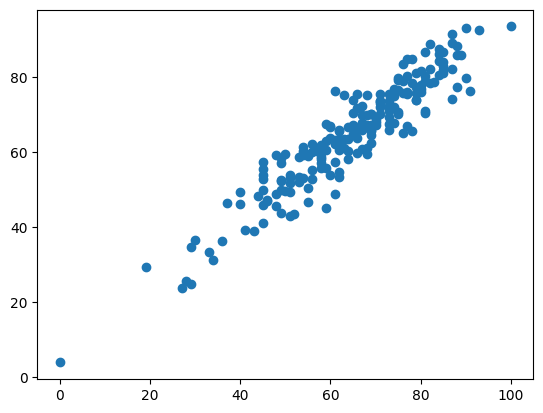

In [97]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_test_pred)

<Axes: xlabel='math_score'>

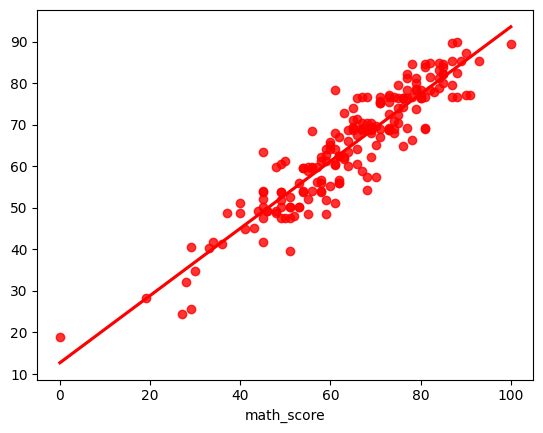

In [92]:
import seaborn as sns
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')